> # Loan Approval Prediction

This kernel I want try to make a loan approval prediction based on [Loan Prediction](https://www.kaggle.com/ninzaami/loan-predication/home) dataset. Previously, I was made the same work for my university couse task but with different dataset. You can see my previous work on [this link](https://github.com/hafidhfikri/Bankruptcy-Prediction-Model) (in Bahasa). This work will compare the result of loan approval prediction classiffication algorithm with different dataset from my previous work. In previous work I get the Gradient Boosting Classifier as the best classifier for loan aproval prediction. Beside that, I want to make some improvement in this kernel inspired by the work of [Baligh's](https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python).

## 1. Import Packages & Data

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn import svm

#Read CSV data
data = pd.read_csv("../input/train_u6lujuX_CVtuZ9i (1).csv")

In [2]:
#preview data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 2. Data Quality & Missing Value Assesment

In [3]:
#Preview data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [4]:
#Check missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Gender - Missing Values

In [5]:
# percent of missing "Gender" 
print('Percent of missing "Gender" records is %.2f%%' %((data['Gender'].isnull().sum()/data.shape[0])*100))

Percent of missing "Gender" records is 2.12%


Number of people who take a loan group by gender :
Male      489
Female    112
Name: Gender, dtype: int64


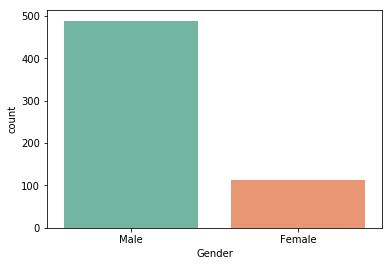

In [6]:
print("Number of people who take a loan group by gender :")
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, palette = 'Set2')

### Married - Missing Values

In [7]:
# percent of missing "Married" 
print('Percent of missing "Married" records is %.2f%%' %((data['Married'].isnull().sum()/data.shape[0])*100))

Percent of missing "Married" records is 0.49%


Number of people who take a loan group by marital status :
Yes    398
No     213
Name: Married, dtype: int64


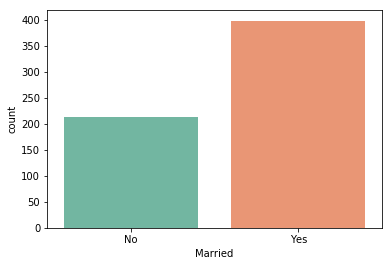

In [8]:
print("Number of people who take a loan group by marital status :")
print(data['Married'].value_counts())
sns.countplot(x='Married', data=data, palette = 'Set2')

### Dependents- Missing Values

In [9]:
# percent of missing "Dependents" 
print('Percent of missing "Dependents" records is %.2f%%' %((data['Dependents'].isnull().sum()/data.shape[0])*100))

Percent of missing "Dependents" records is 2.44%


Number of people who take a loan group by dependents :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


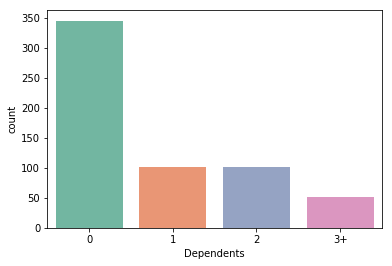

In [10]:
print("Number of people who take a loan group by dependents :")
print(data['Dependents'].value_counts())
sns.countplot(x='Dependents', data=data, palette = 'Set2')

### Self Employed - Missing Values

In [11]:
# percent of missing "Self_Employed" 
print('Percent of missing "Self_Employed" records is %.2f%%' %((data['Self_Employed'].isnull().sum()/data.shape[0])*100))

Percent of missing "Self_Employed" records is 5.21%


Number of people who take a loan group by self employed :
No     500
Yes     82
Name: Self_Employed, dtype: int64


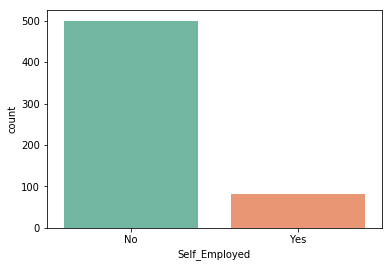

In [12]:
print("Number of people who take a loan group by self employed :")
print(data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=data, palette = 'Set2')

### Loan Amount - Missing Values

In [13]:
# percent of missing "LoanAmount" 
print('Percent of missing "LoanAmount" records is %.2f%%' %((data['LoanAmount'].isnull().sum()/data.shape[0])*100))

Percent of missing "LoanAmount" records is 3.58%


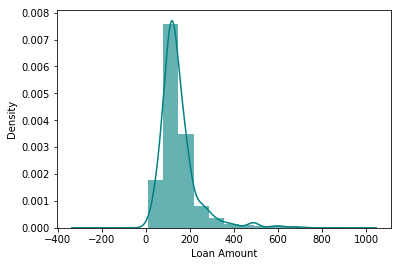

In [14]:
ax = data["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

### Loan Amount Term - Missing Values

In [15]:
# percent of missing "Loan_Amount_Term" 
print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((data['Loan_Amount_Term'].isnull().sum()/data.shape[0])*100))

Percent of missing "Loan_Amount_Term" records is 2.28%


Number of people who take a loan group by loan amount term :
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


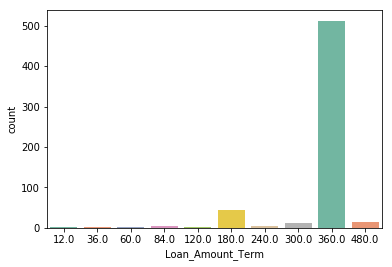

In [16]:
print("Number of people who take a loan group by loan amount term :")
print(data['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=data, palette = 'Set2')

### Credit History - Missing Values

In [17]:
# percent of missing "Credit_History" 
print('Percent of missing "Credit_History" records is %.2f%%' %((data['Credit_History'].isnull().sum()/data.shape[0])*100))

Percent of missing "Credit_History" records is 8.14%


Number of people who take a loan group by credit history :
1.0    475
0.0     89
Name: Credit_History, dtype: int64


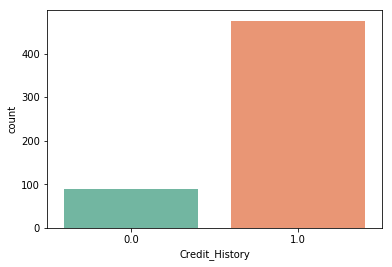

In [18]:
print("Number of people who take a loan group by credit history :")
print(data['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=data, palette = 'Set2')

## 3. Final Adjustments to Data

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:

* If "Gender" is missing for a given row, I'll impute with Male (most common answer).
* If "Married" is missing for a given row, I'll impute with yes (most common answer).
* If "Dependents" is missing for a given row, I'll impute with 0 (most common answer).
* If "Self_Employed" is missing for a given row, I'll impute with no (most common answer).
* If "LoanAmount" is missing for a given row, I'll impute with mean of data.
* If "Loan_Amount_Term" is missing for a given row, I'll impute with 360 (most common answer).
* If "Credit_History" is missing for a given row, I'll impute with 1.0 (most common answer).

In [19]:
train_data = data.copy()
train_data['Gender'].fillna(train_data['Gender'].value_counts().idxmax(), inplace=True)
train_data['Married'].fillna(train_data['Married'].value_counts().idxmax(), inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].value_counts().idxmax(), inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].value_counts().idxmax(), inplace=True)
train_data["LoanAmount"].fillna(train_data["LoanAmount"].mean(skipna=True), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].value_counts().idxmax(), inplace=True)

In [20]:
#Check missing values
train_data.isnull().sum()
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [21]:
#Convert some object data type to int64
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}

train_data['Gender'] = train_data['Gender'].replace(gender_stat)
train_data['Married'] = train_data['Married'].replace(yes_no_stat)
train_data['Dependents'] = train_data['Dependents'].replace(dependents_stat)
train_data['Education'] = train_data['Education'].replace(education_stat)
train_data['Self_Employed'] = train_data['Self_Employed'].replace(yes_no_stat)
train_data['Property_Area'] = train_data['Property_Area'].replace(property_stat)

In [22]:
#Preview data information
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## 4. Making Prediction

In [23]:
#Separate feature and target
x = train_data.iloc[:,1:12]
y = train_data.iloc[:,12]

#make variabel for save the result and to show it
classifier = ('Gradient Boosting','Random Forest','Decision Tree','K-Nearest Neighbor','SVM')
y_pos = np.arange(len(classifier))
score = []

In [24]:
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 78.02%


In [25]:
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 76.38%


In [26]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 69.73%


In [27]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 61.24%


In [28]:
clf  =  svm.LinearSVC(max_iter=5000)
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accuration of classification is 58.96%


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## 5. Result

The result is Gradient Boosting Classifier have the highest score from other classification algorithm. These result are similar to my previous works.

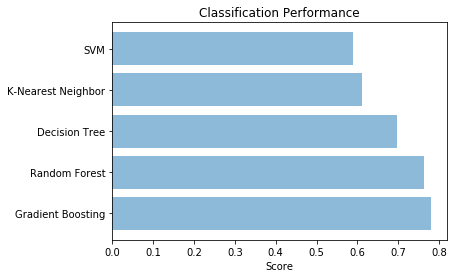

In [29]:
plt.barh(y_pos, score, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()

## Reference
1. J. Heo and J. Y. Yang, "AdaBoost Based Bankruptcy Forecasting of Korean Construction Company," Applied Soft Computing, vol. 24, pp. 494-499, 2014.
2. C.-F. Tsai, "Feature Selection in Bankruptcy Prediction," Knowledge Based System, pp. 120-127, 2009.